In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
import time
import sklearn
import scipy
from numpy import loadtxt
#Imports possibly useful software for Python
t=Table.read('NGC2264TGAS.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference

The columns within this catalog are: 
['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Epoch', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__Gmag_', 'GLON', 'GLAT']


In [50]:
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
print(NGC2264RA)
print(NGC2264Dec)
#Prints out the RA and Dec columns to look at

   RA_ICRS    
     deg      
--------------
100.6327707505
100.6398328086
100.4680952684
100.4510082323
100.4476071735
100.4648208441
100.4540007658
100.5560505427
100.5562984362
100.5462777786
           ...
100.3592483130
100.2370948238
100.2378267369
100.2282555322
100.2304252821
100.2347359260
100.2594053504
100.2138374049
100.2309625401
100.2276064814
Length = 31999 rows
   DE_ICRS    
     deg      
--------------
  8.9017042292
  8.9085747212
  8.9009073051
  8.9001460820
  8.9006585064
  8.9004479796
  8.9074642075
  8.9003747840
  8.9015303723
  8.9014491171
           ...
 10.4991714677
 10.4732182662
 10.4815485224
 10.4800883796
 10.4905333556
 10.4963763307
 10.4898754274
 10.4887503065
 10.4994506182
 10.4997749375
Length = 31999 rows


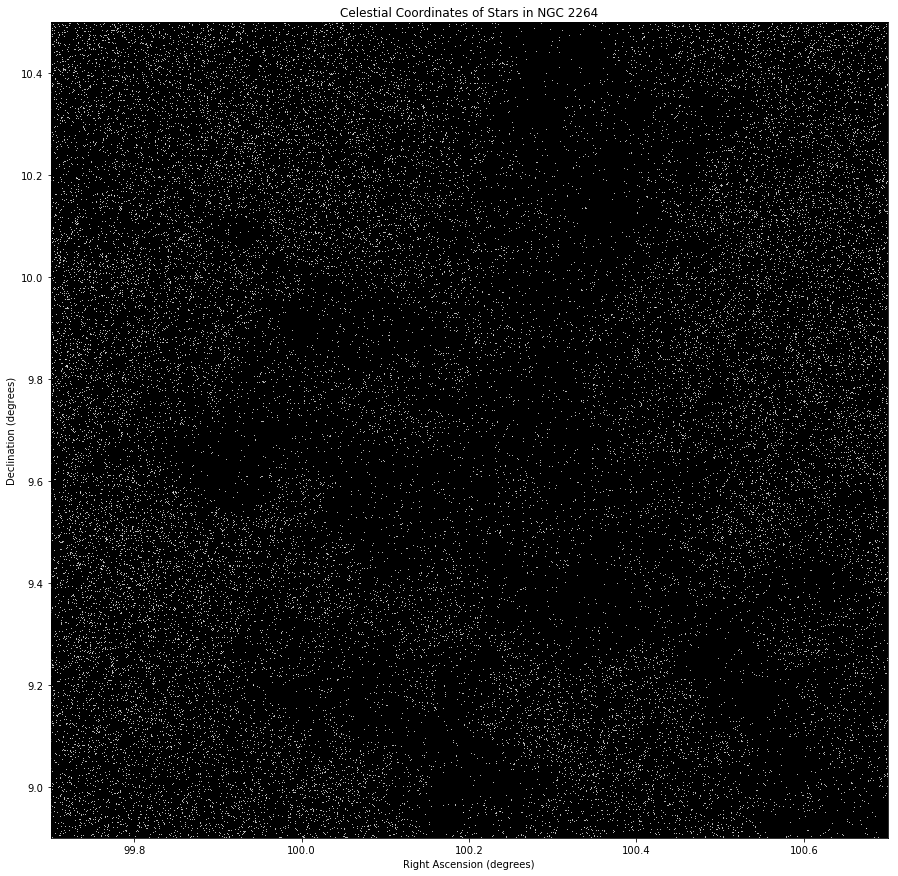

In [51]:
plt.rcParams['axes.facecolor']='black'
plt.rcParams['figure.figsize']=15,15
#Sets background color and figure size
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
plt.plot(NGC2264RA,NGC2264Dec,color='xkcd:white',linestyle='None',marker='*',markersize=0.2)
#Plots coordinates as white stars with no lines
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Celestial Coordinates of Stars in NGC 2264')
#Adds appropriate labels and title
plt.xlim([99.70,100.70])
plt.ylim([8.90,10.50])
#Changes the plot limits to cut off edges
plt.show()

In [61]:
NGC2264RAStDev=numpy.std(NGC2264RA)
NGC2264DecStDev=numpy.std(NGC2264Dec)
#Computes standard deviations of each array
NGC2264RAAverage=numpy.average(NGC2264RA)
NGC2264DecAverage=numpy.average(NGC2264Dec)
#Computes averages of each array
NGC2264StarRA=NGC2264RA-NGC2264RAAverage
NGC2264StarRA=NGC2264StarRA/NGC2264RAStDev
#Shifts and normalizes the RA so it is easy to work with
NGC2264StarDec=NGC2264Dec-NGC2264DecAverage
NGC2264StarDec=NGC2264StarDec/NGC2264DecStDev
#Shifts and normalizes the Dec so it is easy to work with

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  """


In [62]:
NGC2264RAPixels=numpy.linspace(99.70,100.70,1501)
NGC2264DecPixels=numpy.linspace(8.90,10.50,1501)
#Creates linearly spaced pixel arrays for next step
NGC2264RAPixels=NGC2264RAPixels-NGC2264RAAverage
NGC2264RAPixels=NGC2264RAPixels/NGC2264RAStDev
#Shifts and normalizes the RA pixels to match the format
NGC2264DecPixels=NGC2264DecPixels-NGC2264DecAverage
NGC2264DecPixels=NGC2264DecPixels/NGC2264DecStDev
#Shifts and normalizes the Dec pixels to match the format
Pixels=numpy.zeros([1501,1501])
#Creates 1501x1501 matrix of zeros for next step

In [ ]:
x=numpy.linspace(-2,2,1000)
y=numpy.linspace(-2,2,1000)
z=numpy.array([i*i+j*j for i in x for j in y])
X,Y=numpy.meshgrid(x,y)
Z=z.reshape(1000,1000)
plt.rcParams['figure.figsize']=12,9
plt.pcolormesh(X,Y,Z,cmap='gist_gray')
plt.colorbar()
plt.show()

In [ ]:
tic=time.time()
from sklearn.neighbors import NearestNeighbors
NGC2264RAPixels=numpy.asarray(NGC2264RAPixels)
NGC2264DecPixels=numpy.asarray(NGC2264DecPixels)
Gridx=numpy.array([])
Gridy=numpy.array([])
l=len(NGC2264RAPixels)
rows=l*l
Grid=numpy.zeros((rows,2))
for i in range(0,l):
    for j in range(0,l):
        Gridx=numpy.append(Gridx,NGC2264RAPixels[i])
for i in range(0,l):
    Gridy=numpy.append(Gridy,NGC2264DecPixels)
Grid=numpy.vstack((Gridx,Gridy))
Grid=numpy.transpose(Grid)
Stars=numpy.vstack((NGC2264StarRA,NGC2264StarDec))
Stars=numpy.transpose(Stars)
neighbors=NearestNeighbors(n_neighbors=2,algorithm='auto').fit(Stars)
distance,indices=neighbors.kneighbors(Grid,2)
'''print('distance')
print(distance)
print('**************************')
print('indices')
print(indices)
print('**************************')'''
print('Done')
toc=time.time()
ElapsedTime=toc-tic
ElapsedTimeMinutes=ElapsedTime/60
print('Elapsed Time: ',ElapsedTime,' seconds (',ElapsedTimeMinutes,' minutes)')

In [8]:
*
tic=time.time()
for x in range(0,len(NGC2264RAPixels)):
    for y in range(0,len(NGC2264DecPixels)):
        EuclideanDistance=numpy.array([])
        #Makes empty array of the distance to each star
        for i in range(0,len(NGC2264RA)):
            EuclideanDistance=numpy.append(EuclideanDistance,numpy.sqrt(numpy.square(NGC2264RA[i]-NGC2264RAPixels[x])+numpy.square(NGC2264Dec[i]-NGC2264DecPixels[y])))
            #Uses the distance formula to calculate distance to every star
        #NearestNeighborIndex=numpy.where(EuclideanDistance==numpy.minimum(EuclideanDistance))
        NearestNeighborDistance=numpy.min(EuclideanDistance)
        #Finds the minimum distance (distance to nearest neighbor)
        Pixels[y,x]=NearestNeighborDistance
        #Assigns that pixels matrix element to be the nearest neighbor distance
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time: ",ElapsedTime)

IndexError: index 11 is out of bounds for axis 0 with size 11

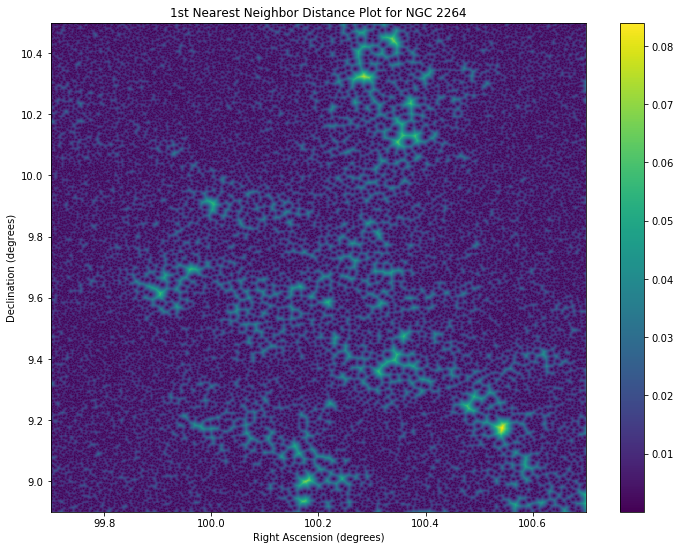

Elapsed Time:  1.632601261138916


In [56]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
firstdistances=distance[:,0]
FirstDistances=numpy.reshape(firstdistances,(-1,len(NGC2264RAPixels)))
FirstDistances=numpy.transpose(FirstDistances)
plt.pcolormesh(X,Y,FirstDistances)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('1st Nearest Neighbor Distance Plot for NGC 2264')
plt.colorbar()
plt.show()
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time: ",ElapsedTime)

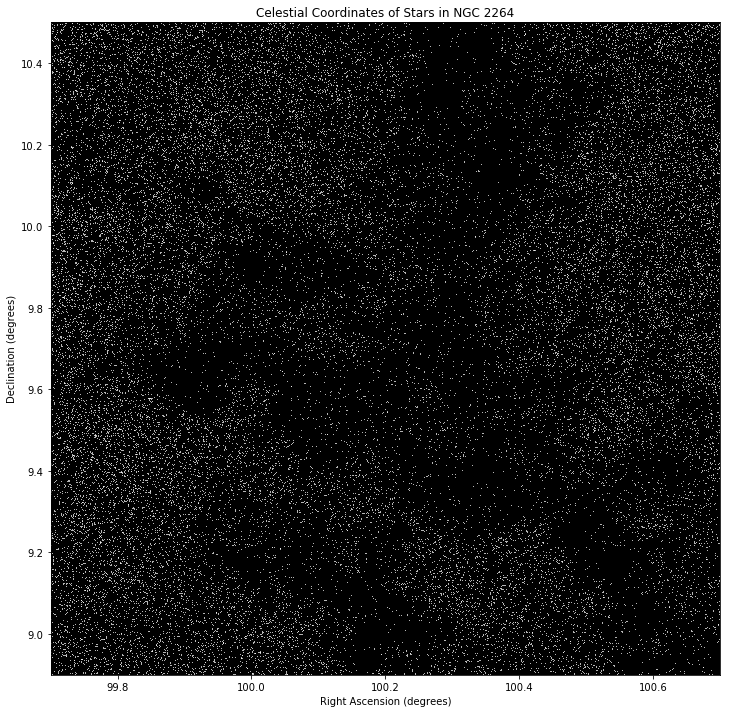

In [58]:
plt.rcParams['axes.facecolor']='black'
plt.rcParams['figure.figsize']=12,12
#Sets background color and figure size
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
plt.plot(NGC2264RA,NGC2264Dec,color='xkcd:white',linestyle='None',marker='*',markersize=0.2)
#Plots coordinates as white stars with no lines
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Celestial Coordinates of Stars in NGC 2264')
#Adds appropriate labels and title
plt.xlim([99.70,100.70])
plt.ylim([8.90,10.50])
#Changes the plot limits to cut off edges
plt.show()

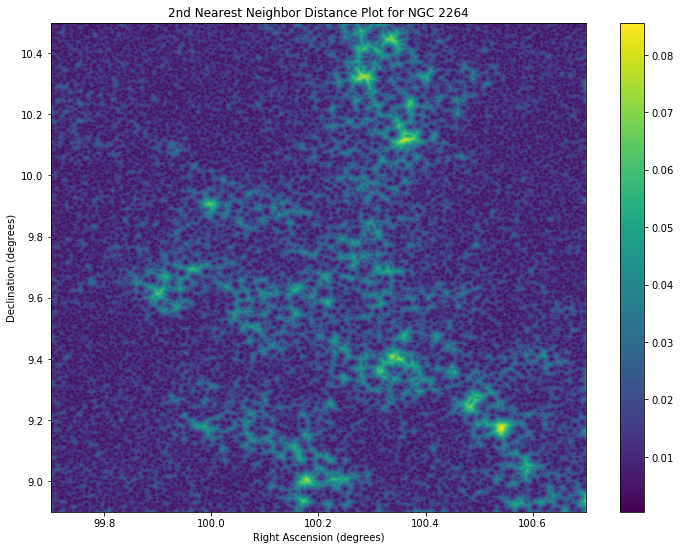

Elapsed Time:  1.7530577182769775


In [59]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
seconddistances=distance[:,1]
SecondDistances=numpy.reshape(seconddistances,(-1,len(NGC2264RAPixels)))
SecondDistances=numpy.transpose(SecondDistances)
plt.pcolormesh(X,Y,SecondDistances)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('2nd Nearest Neighbor Distance Plot for NGC 2264')
plt.colorbar()
plt.show()
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time: ",ElapsedTime)

In [ ]:
plt.contour(FirstDistances)
plt.title('1st Nearest Neighbor Distances Contour Plot')
plt.show()
plt.contour(SecondDistances)
plt.title('2nd Nearest Neighbor Distances Contour Plot')
plt.show()

In [45]:
print(NGC2264RA)
#sifi.spatial.kdtree
#function to use?
#scipy.stats.gaussian_kde
#function to use?
print(NGC2264Dec)

   RA_ICRS    
--------------
  1.4763865075
 1.49868248052
0.956481395667
0.902535068617
0.891797417613
0.946143548708
0.911982944185
 1.23416934373
 1.23495198057
 1.20331526669
           ...
0.622800015361
0.612835287588
0.227178463311
 0.22948922237
0.199271498478
0.206121723236
0.219731070361
 0.29761613065
0.153751315445
0.207817927048
0.197222348086
Length = 31999 rows
   DE_ICRS    
--------------
 -1.7787906939
-1.76418609771
-1.78048471446
-1.78210284544
-1.78101358554
-1.78146110209
-1.76654671528
-1.78161669389
-1.77916026129
-1.77933298537
           ...
 1.61833636759
 1.61694340231
 1.56177471458
 1.57948232969
 1.57637850598
  1.5985813783
 1.61100178311
 1.59718282116
 1.59479115308
 1.61753679218
  1.6182261973
Length = 31999 rows


In [34]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
#Distances=numpy.zeros(len(NGC2264RAPixels),len(NGC2264RAPixels))
distances=distance[:,0]
Distances=numpy.reshape(distances,(-1,len(NGC2264RAPixels)))
print(Distances)

[[ 0.00506352  0.00431212  0.00486489  0.00454369  0.02784838  0.01609017
   0.005533    0.01081597  0.01085985  0.01478828  0.01011528  0.01001073
   0.02141854  0.0038386   0.00707988  0.00485954]
 [ 0.01071976  0.01514187  0.00539865  0.00229223  0.0123913   0.00508434
   0.00707781  0.01060612  0.00743727  0.0110226   0.01164058  0.00396747
   0.00607406  0.00503981  0.0067876   0.01054552]
 [ 0.01421062  0.00779621  0.00689937  0.00363542  0.00826994  0.00231631
   0.00356517  0.0093801   0.00475589  0.01056302  0.0106312   0.00413601
   0.00327162  0.00331099  0.01071357  0.01396451]
 [ 0.01209301  0.00467848  0.01054528  0.00614108  0.00121759  0.00319128
   0.00678525  0.00897644  0.00786963  0.00079369  0.01010584  0.00388991
   0.0028096   0.00132676  0.0037772   0.00755641]
 [ 0.01823211  0.00515099  0.00713364  0.01042593  0.00468669  0.00656552
   0.00529047  0.01779112  0.0141282   0.01353062  0.00687345  0.00868679
   0.00521908  0.0054237   0.01334377  0.00971118]
 [ 0.

In [ ]:
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
Duplicates=t["Dup"]
#Defines Duplicates from the array of duplicates Dup in the table
DuplicateMask=0
for i in range(0,len(Duplicates)):
    if Duplicates[i]>0.5:
        DuplicateMask=DuplicateMask+1
        Row=t[i]
        Index=Row._index
        Columns=row._table.columns.values()
        for j in Columns:
            Columns.mask[i]=True
for k in range(0,len(Duplicates)):
    if Duplicates[k]>0.5:
        print(k,Duplicates[k])
Distance=1000./t["Plx"]
#Defines the distance to the stars in parsecs (pc)
RA=t["RAJ2000"]
Dec=t["DEJ2000"]
#Defines the celestial coordinates from the table
NGC2264RA=numpy.array([])
NGC2264Dec=numpy.array([])
#Creates empty arrays into which the NGC 2264 coordinates will be added
for i in range(0,len(RA)):
    if RA[i]>=99.70 and RA[i]<=100.70 and Dec[i]>=8.90 and Dec[i]<=10.50:
        NGC2264RA=numpy.append(NGC2264RA,RA[i])
        NGC2264Dec=numpy.append(NGC2264Dec,Dec[i])
#Checks if a star is within the coordinate bounds for NGC 2264 and, if it is, adds it to the coordinate arrays